In [1]:
from pathlib import Path
import uproot
import numpy as np
from uncertainties import ufloat, unumpy as unp

ROOT_DIR = Path("./data/processed_clean_bp_p")

# keep only real .root files (ignore EOS version folders)
root_files = [p for p in ROOT_DIR.glob("2024_B2*_B*_F*.root") if p.is_file()]
print(f"Processing {len(root_files)} ROOT files\n")

u_nsig = [] # one NumPy array of ufloat per file  (same order as root_files)

for fpath in root_files:
    print(f"=== {fpath.name} ===")
    with uproot.open(fpath) as rf:
        if "fit_results" not in rf:
            print("  [no TTree 'fit_results' → skipping]\n")
            continue

        tree = rf["fit_results"]

        # read the numeric branches
        arr_nsig     = tree["nsig"    ].array(library="np")
        arr_nsig_err = tree["nsig_err"].array(library="np")

        # combine value + error into one ufloat per entry
        arr_u = unp.uarray(arr_nsig, arr_nsig_err) # vectorised creation
        u_nsig.append(arr_u)

        # pretty-print every entry
        for idx, val in enumerate(arr_u):
            print(f"  entry {idx:2d}: {val}") # shows  1234.0+/-56.0
        print()

print("---------------------------------------------------------------")
print(f"Built list 'u_nsig'  →  len(u_nsig) = {len(u_nsig)}")
print("Each element is a NumPy array of ufloats matching that file's entries.")


Processing 132 ROOT files

=== 2024_B2OC_B6_F10130.root ===
  entry  0: (5.65+/-0.05)e+04

=== 2024_B2CC_B5_F10061.root ===
  entry  0: (2.83+/-0.04)e+04

=== 2024_B2OC_B8_F10216.root ===
  entry  0: (1.803+/-0.032)e+04

=== 2024_B2OC_B5_F10091.root ===
  entry  0: (2.313+/-0.034)e+04

=== 2024_B2CC_B5_F10077.root ===
  entry  0: (5.31+/-0.05)e+04

=== 2024_B2CC_B5_F10098.root ===
  entry  0: (2.80+/-0.04)e+04

=== 2024_B2OC_B5_F10087.root ===
  entry  0: (5.19+/-0.05)e+04

=== 2024_B2OC_B6_F10126.root ===
  entry  0: (2.75+/-0.04)e+04

=== 2024_B2OC_B7_F10210.root ===
  entry  0: (4.87+/-0.05)e+04

=== 2024_B2CC_B6_F10115.root ===
  entry  0: (6.43+/-0.06)e+04

=== 2024_B2OC_B7_F10206.root ===
  entry  0: (1.398+/-0.027)e+04

=== 2024_B2OC_B7_F10197.root ===
  entry  0: (4.93+/-0.05)e+04

=== 2024_B2CC_B8_F10225.root ===
  entry  0: (2.12+/-0.04)e+04

=== 2024_B2OC_B5_F10072.root ===
  entry  0: (5.10+/-0.05)e+04

=== 2024_B2CC_B5_F10082.root ===
  entry  0: (1.362+/-0.027)e+04

=== 2


=== Block 5 ===
Fills: [10059, 10061, 10066, 10069, 10070, 10072, 10073, 10074, 10075, 10077, 10082, 10084, 10086, 10087, 10090, 10091, 10092, 10093, 10094, 10095, 10096, 10097, 10098, 10099, 10100]
Ratio per fill (value ±1σ):
  fill 10059:  0.745+/-0.027
  fill 10061:  0.721+/-0.014
  fill 10066:  1.579+/-0.026
  fill 10069:  0.715+/-0.009
  fill 10070:  5.73+/-0.14
  fill 10072:  0.714+/-0.009
  fill 10073:  0.729+/-0.009
  fill 10074:  0.926+/-0.012
  fill 10075:  0.733+/-0.018
  fill 10077:  0.710+/-0.010
  fill 10082:  0.725+/-0.021
  fill 10084:  0.271+/-0.004
  fill 10086:  0.743+/-0.017
  fill 10087:  0.713+/-0.009
  fill 10090:  0.688+/-0.009
  fill 10091:  0.705+/-0.013
  fill 10092:  1.146+/-0.012
  fill 10093:  0.672+/-0.018
  fill 10094:  0.706+/-0.017
  fill 10095:  0.707+/-0.008
  fill 10096:  0.851+/-0.017
  fill 10097:  0.747+/-0.010
  fill 10098:  0.704+/-0.014
  fill 10099:  0.678+/-0.012
  fill 10100:  0.721+/-0.009
Constant fit:  a = 0.639277 ± 0.049834
χ² = 12895

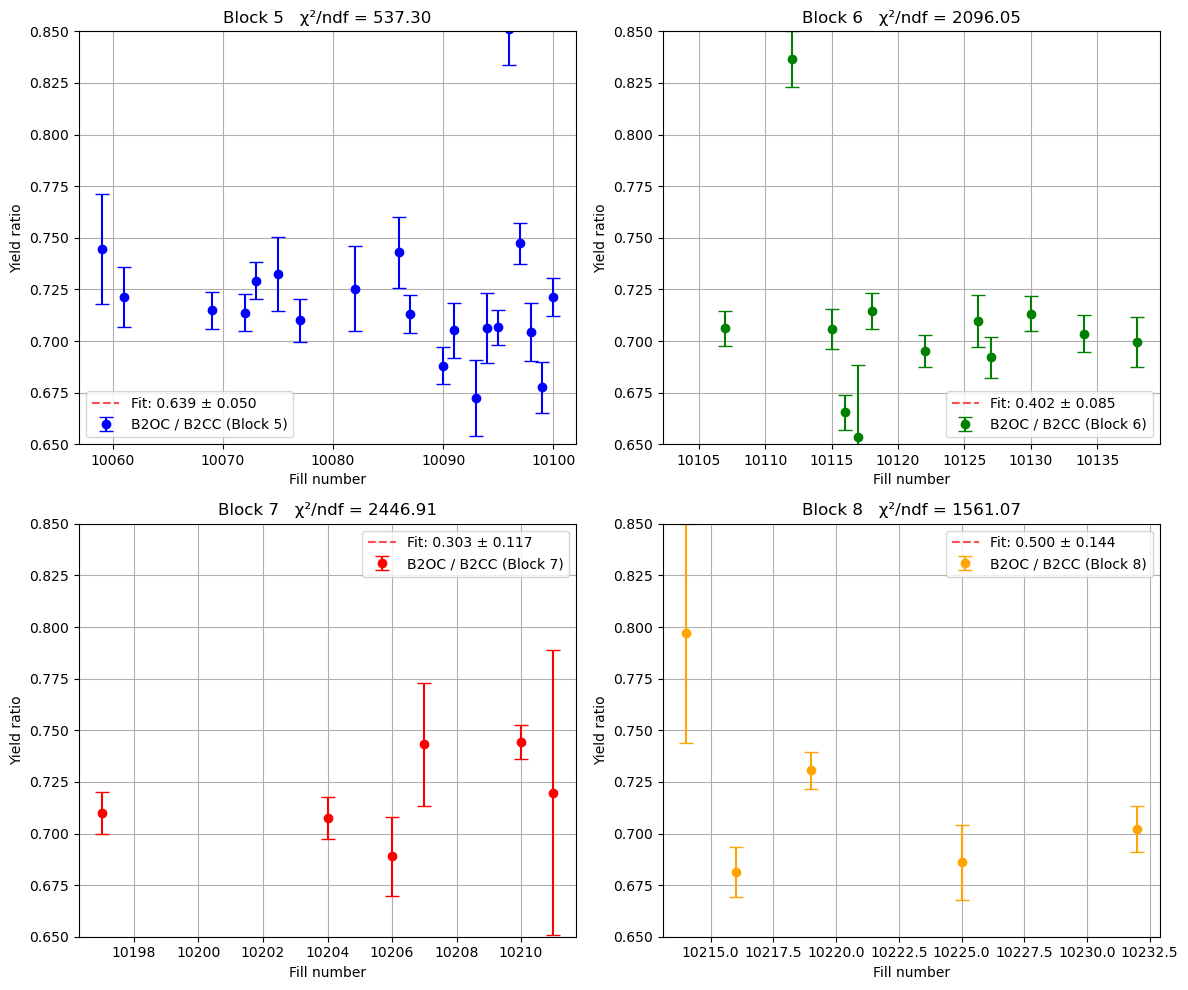


SUMMARY TABLE: B2OC / B2CC Ratios by Block
Block  Ratio        Error        χ²/ndf   Fills
------------------------------------------------------------
5      0.639277     0.049834     537.30   [10059, 10061, 10066, 10069, 10070, 10072, 10073, 10074, 10075, 10077, 10082, 10084, 10086, 10087, 10090, 10091, 10092, 10093, 10094, 10095, 10096, 10097, 10098, 10099, 10100]
6      0.402145     0.085015     2096.05  [10104, 10105, 10107, 10112, 10115, 10116, 10117, 10118, 10122, 10125, 10126, 10127, 10130, 10132, 10134, 10137, 10138]
7      0.303379     0.117290     2446.91  [10197, 10199, 10200, 10201, 10204, 10206, 10207, 10208, 10209, 10210, 10211]
8      0.499595     0.143937     1561.07  [10214, 10215, 10216, 10218, 10219, 10222, 10223, 10225, 10230, 10232]


In [ ]:
# ---------------------------------------------------------------
# Plot B2OC / B2CC yield ratio for ALL blocks (5, 6, 7, 8)
# ---------------------------------------------------------------
import re
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import unumpy as unp
from scipy.optimize import curve_fit

# Gather total nsig per (campaign, block, fill)
tot = {"B2OC": {}, "B2CC": {}}
blocks = [5, 6, 7, 8]

for block in blocks:
    tot["B2OC"][block] = {}
    tot["B2CC"][block] = {}

for path, arr_u in zip(root_files, u_nsig):
    fname = path.name.upper()

    # extract block number
    block_match = re.search(r"_B(\d+)_", fname)
    if not block_match:
        continue
    block = int(block_match.group(1))
    
    # only process blocks 5, 6, 7, 8
    if block not in blocks:
        continue

    # campaign tag
    if   "B2OC" in fname:
        camp = "B2OC"
    elif "B2CC" in fname:
        camp = "B2CC"
    else:
        continue

    # extract fill number, e.g. "…_F10059"
    fill_match = re.search(r"_F(\d+)", fname)
    if not fill_match:
        continue
    fill = int(fill_match.group(1))

    # total yield in this file (value + error propagate)
    tot[camp][block][fill] = arr_u.sum()

# Plot each block separately
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

block_colors = ['blue', 'green', 'red', 'orange']
all_fits = {}

for i, block in enumerate(blocks):
    ax = axes[i]
    
    # Build ratios for fills that appear in *both* campaigns for this block
    fills = sorted(set(tot["B2OC"][block]) & set(tot["B2CC"][block]))
    
    if len(fills) == 0:
        ax.text(0.5, 0.5, f"No common fills\nfor Block {block}", 
                ha='center', va='center', transform=ax.transAxes)
        ax.set_title(f"Block {block}")
        continue
    
    rat_u = [tot["B2OC"][block][f] / tot["B2CC"][block][f] for f in fills]
    rat_val = unp.nominal_values(rat_u)
    rat_err = unp.std_devs(rat_u)
    
    # Plot
    ax.errorbar(fills, rat_val, yerr=rat_err, fmt='o', capsize=5,
                color=block_colors[i], ecolor=block_colors[i], 
                label=f'B2OC / B2CC (Block {block})')
    ax.set_xlabel("Fill number")
    ax.set_ylabel("Yield ratio")
    # ax.set_ylim(0.65, 0.85) 
    ax.grid(True)
    
    # Fit to a constant
    def const(x, a): return a
    if len(fills) > 1:
        popt, pcov = curve_fit(const, fills, rat_val, sigma=rat_err)
        a_fit = popt[0]
        sig_a = np.sqrt(pcov[0,0])
        
        chi2 = np.sum(((rat_val - a_fit)/rat_err)**2)
        chi2rd = chi2 / (len(fills) - 1) if len(fills) > 1 else 0
        
        ax.axhline(a_fit, color='red', linestyle='--', alpha=0.7,
                   label=f"Fit: {a_fit:.3f} ± {sig_a:.3f}")
        ax.set_title(f"Block {block}   χ²/ndf = {chi2rd:.2f}")
        
        all_fits[block] = {'ratio': a_fit, 'error': sig_a, 'chi2rd': chi2rd, 'fills': fills}
    else:
        ax.set_title(f"Block {block} (single fill)")
        all_fits[block] = {'ratio': rat_val[0], 'error': rat_err[0], 'chi2rd': 0, 'fills': fills}
    
    ax.legend()
    
    # Print numerical results for this block
    print(f"\n=== Block {block} ===")
    print(f"Fills: {fills}")
    print("Ratio per fill (value ±1σ):")
    for f, r in zip(fills, rat_u):
        print(f"  fill {f}:  {r}")
    
    if len(fills) > 1:
        print(f"Constant fit:  a = {a_fit:.6f} ± {sig_a:.6f}")
        print(f"χ² = {chi2:.2f}  for {len(fills)-1} dof  →  χ²/ndf = {chi2rd:.2f}")

plt.tight_layout()
plt.show()

# Print summary table
print("\n" + "="*60)
print("SUMMARY TABLE: B2OC / B2CC Ratios by Block")
print("="*60)
print(f"{'Block':<6} {'Ratio':<12} {'Error':<12} {'χ²/ndf':<8} {'Fills'}")
print("-"*60)
for block in blocks:
    if block in all_fits:
        fit = all_fits[block]
        fills_str = str(fit['fills'])
        print(f"{block:<6} {fit['ratio']:<12.6f} {fit['error']:<12.6f} {fit['chi2rd']:<8.2f} {fills_str}")
    else:
        print(f"{block:<6} {'No data':<12} {'---':<12} {'---':<8} {'[]'}")